 <a id = 'top'></a>
 ## Table Content
 - [Regression](#regr)
     - [EDA](#eda_reg)
     - [Preprocessing](#pre_reg)
     - [Splitting of data & training the data](#selection_reg)
     - [Results](#res_reg)
 - [Classification](#cl)
     - [EDA](#eda_cl)
     - [Preprocessing](#pre_cl)
     - Model Selction
         - [Logistic Regression](#log)
         - [Decision Tree](#dt)
         - [Random Forest](#rn)
         - [KNN](#knn)
         - [SVM](#svm)
         - [Naive Bayes](#nb)
 - [End Results](#end)

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#Getting the data into variable "df"
df = pd.read_csv('Customer_Churn.csv')

In [3]:
#To check top 5 rows of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#To check last 5 rows of the data
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
#Checking column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#Looking at the total number of null values(No null values in our data)
df.isna().sum().sum()

0

In [7]:
#Looking at the datatype of all the independent variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<a id = 'regr'></a> 
# Regression
[Go To Top](#top)

<a id = 'eda_reg'></a>
#### Doing EDA(Exploratory Data Analysis) for Regression(target variable is `TotalCharges`)

In [8]:
#Changing the data type of target variable to continuous datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [9]:
df.dropna(axis = 0,inplace = True)

In [10]:
#looking at the unique values in this column we can see that Customer id is different for every record so it does not play any role in prediction
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [11]:
#Checking the distinct values in gender 
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
#Checking the count for each subcategoy
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

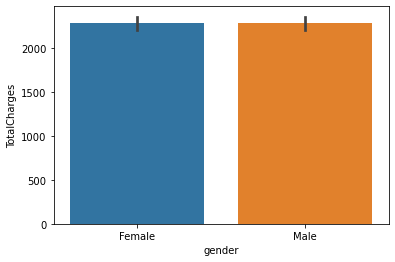

In [13]:
#Theres not enough distinction between the two subcategories, therefore we will not be taking this variable for prediction purposes
sns.barplot(x = 'gender', y = 'TotalCharges', data = df)

In [14]:
#The variable SeniorCitizen has the datatype int64, but essentially it is a categorical variable
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [15]:
#Checking the count for each subcategoy
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='TotalCharges'>

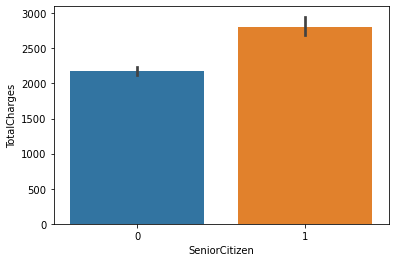

In [16]:
#Theres not enough distinction between the two subcategories(there is difference of 500 or 700 at the 
#top end but still thats not enough), therefore we will not be taking this variable for prediction purposes
sns.barplot(x = 'SeniorCitizen', y = 'TotalCharges', data = df)

In [17]:
#Checking for distinct values
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
#Checking the count for each subcategoy
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='TotalCharges'>

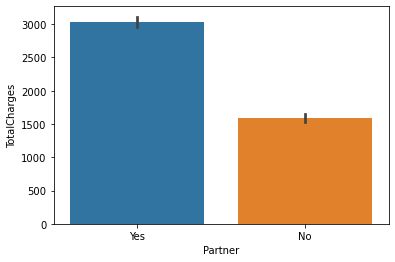

In [19]:
#There is good enough distinction between the two subcategories so will be using this variable
sns.barplot(x = 'Partner', y = 'TotalCharges', data = df)

In [20]:
#All the final variables for regression will be kept in the variable X_Reg
X_Reg = pd.DataFrame()
X_Reg['Partner'] = df['Partner']

In [21]:
#Checking for distinct values
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
#Checking the count for each subcategoy
df['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='TotalCharges'>

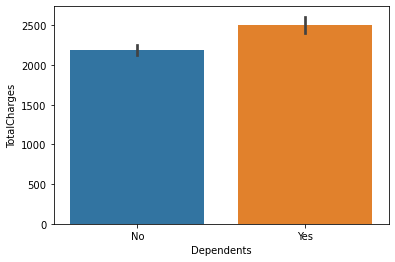

In [23]:
#Theres not enough distinction between the two subcategories(there is difference of 200 or 300 at the 
#top end but still thats not enough), therefore we will not be taking this variable for prediction purposes
sns.barplot(x = 'Dependents', y = 'TotalCharges', data = df)

In [24]:
#Checking for distinct values
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

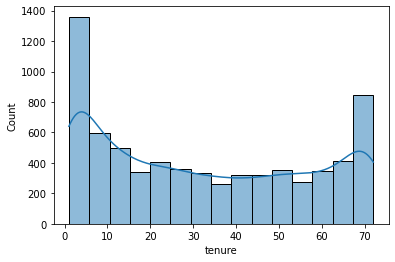

In [25]:
sns.histplot(df['tenure'], kde = True)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

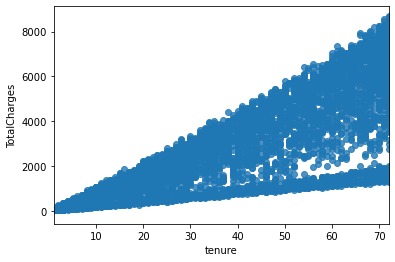

In [26]:
#Great Relationship between the two. So, a great predictor
sns.regplot(x = 'tenure', y = 'TotalCharges', data = df)

In [27]:
#WE will use the tenure varibale in prediction
X_Reg['tenure'] = df['tenure']

In [28]:
#Checking for distinct values
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
#Checking the count for each subcategoy
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='TotalCharges'>

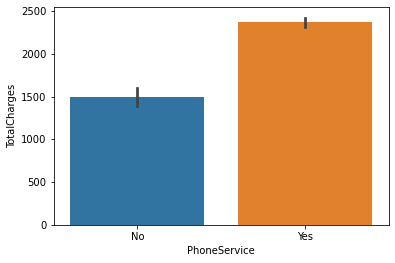

In [30]:
#Since there are just 632 records for "NO" subcategory and there is not good distinction between the two subcategories
#WE will not be taking this variable
sns.barplot(x = 'PhoneService', y = 'TotalCharges', data = df)

In [31]:
#Checking for distinct values
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [32]:
#Checking the count for each subcategoy
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='TotalCharges'>

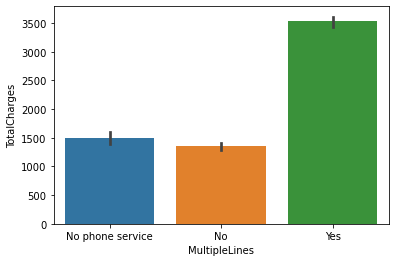

In [33]:
#If the MultipleLines's subcategory is Yes, price is going to be relatively higher. Good predictor
sns.barplot(x = 'MultipleLines', y = 'TotalCharges', data = df)

In [34]:
#WE will use this varibale in prediction
X_Reg['MultipleLines'] = df['MultipleLines']

In [35]:
#Checking for distinct values
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [36]:
#Checking the count for each subcategoy
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='TotalCharges'>

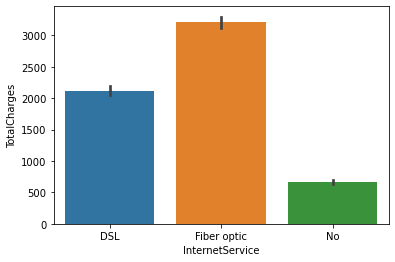

In [37]:
#Great Predictor. #If the InternetService's subcategory is Fiber optic, price is going to be relatively higher
sns.barplot(x = 'InternetService', y = 'TotalCharges', data = df)

In [38]:
#Checking for distinct values
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [39]:
#Checking the count for each subcategoy
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='TotalCharges'>

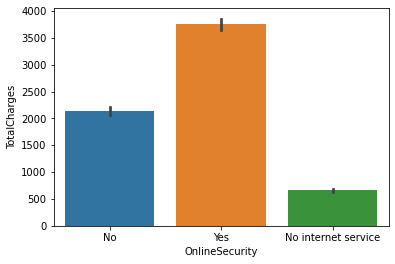

In [40]:
#Online Security and Internet Service might create multicollinearilty , therefore we will be taking just one of the two
sns.barplot(x = 'OnlineSecurity', y = 'TotalCharges', data = df)

In [41]:
#Checking for distinct values
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [42]:
#Checking the count for each subcategoy
df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

<AxesSubplot:xlabel='OnlineBackup', ylabel='TotalCharges'>

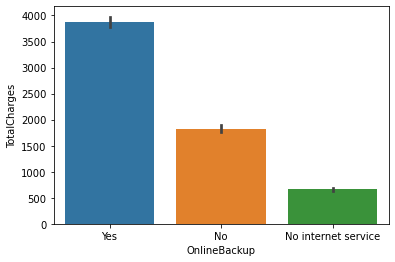

In [43]:
#Online Backup and Internet Service might create multicollinearilty , therefore we will be taking just one of the two
sns.barplot(x = 'OnlineBackup', y = 'TotalCharges', data = df)

In [44]:
#Checking for distinct values
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [45]:
#Checking the count for each subcategoy
df['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

<AxesSubplot:xlabel='DeviceProtection', ylabel='TotalCharges'>

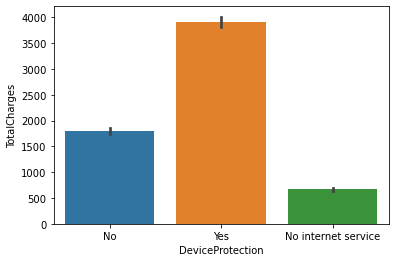

In [46]:
#Device Protection and Internet Service might create multicollinearilty , therefore we will be taking just one of the two
sns.barplot(x = 'DeviceProtection', y = 'TotalCharges', data = df)

In [47]:
#Checking for distinct values
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [48]:
#Checking the count for each subcategoy
df['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

<AxesSubplot:xlabel='TechSupport', ylabel='TotalCharges'>

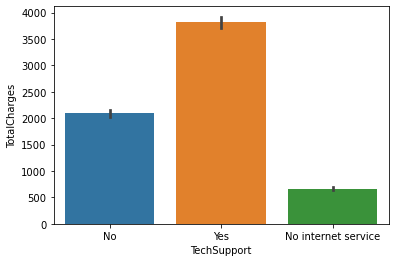

In [49]:
#TechSupport and Internet Service might create multicollinearilty , therefore we will be taking just one of the two
sns.barplot(x = 'TechSupport', y = 'TotalCharges', data = df)

In [50]:
#Checking for distinct values
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [51]:
#Checking the count for each subcategoy
df['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='TotalCharges'>

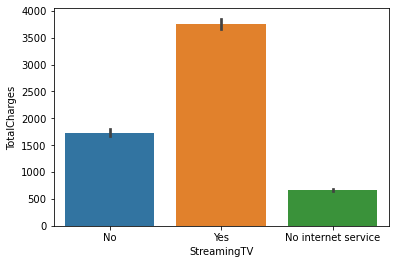

In [52]:
#StreamingTV and Internet Service might create multicollinearilty , therefore we will be taking just one of the two
sns.barplot(x = 'StreamingTV', y = 'TotalCharges', data = df)

In [53]:
#Checking for distinct values
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [54]:
#Checking the count for each subcategoy
df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

<AxesSubplot:xlabel='StreamingMovies', ylabel='TotalCharges'>

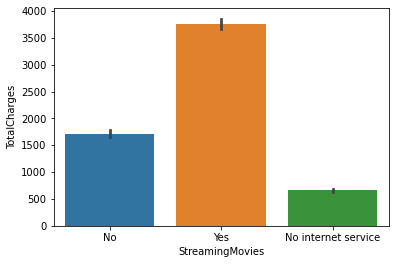

In [55]:
#StreamingMovies and Internet Service might create multicollinearilty , therefore we will be taking just one of the two
sns.barplot(x = 'StreamingMovies', y = 'TotalCharges', data = df)

In [56]:
#Checking for distinct values
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [57]:
#Checking the count for each subcategoy
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

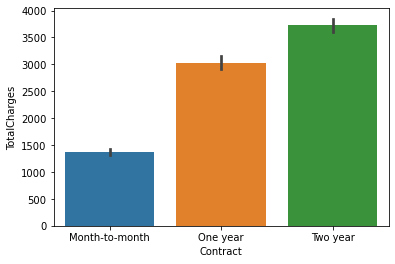

In [58]:
#Good enough distinction betwen the three. Good enough as a predictor
sns.barplot(x = 'Contract', y = 'TotalCharges', data = df)

In [59]:
X_Reg['Contract'] = df['Contract'] 

In [60]:
#Checking for distinct values
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [61]:
#Checking the count for each subcategoy
df['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='TotalCharges'>

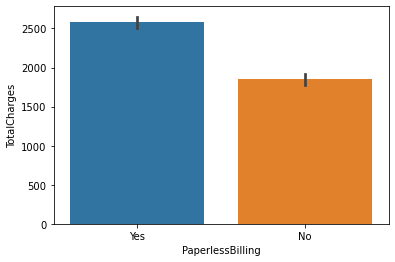

In [62]:
#Theres not enough distinction between the two subcategories(there is difference of 500 or 700 at the 
#top end but still thats not enough), therefore we will not be taking this variable for prediction purposes
sns.barplot(x = 'PaperlessBilling', y = 'TotalCharges', data = df)

In [63]:
#Checking for distinct values
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [64]:
#Checking the count for each subcategoy
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

<AxesSubplot:xlabel='PaymentMethod', ylabel='TotalCharges'>

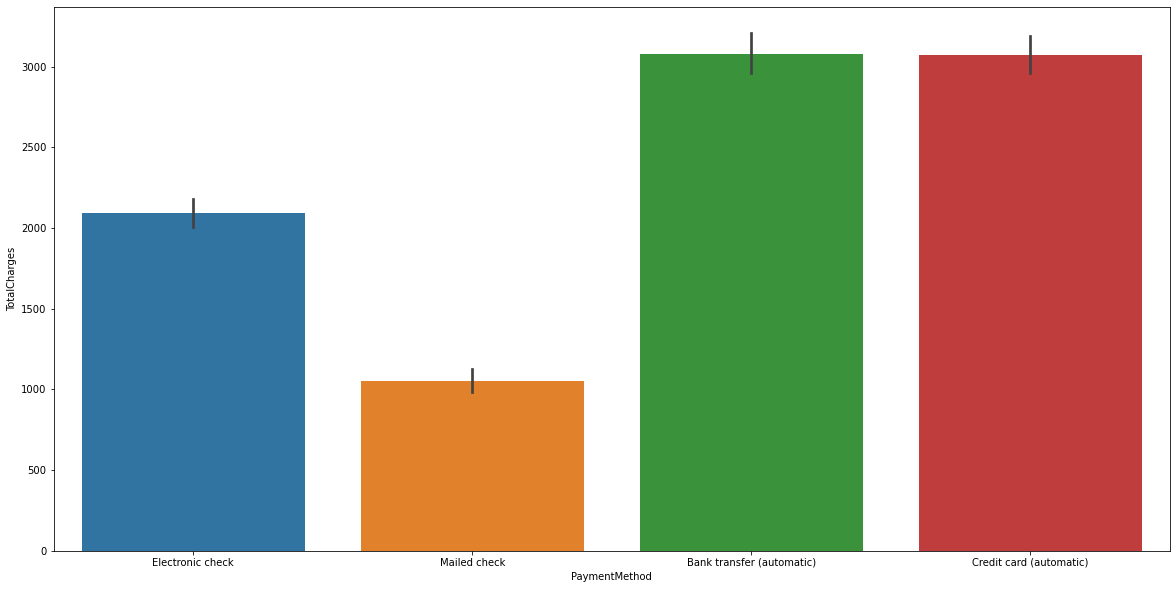

In [65]:
#Not that great of a predictor but we will take it
plt.figure(figsize = (20,10))
sns.barplot(x = 'PaymentMethod', y = 'TotalCharges', data = df)

In [66]:
#Checking for distinct values
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

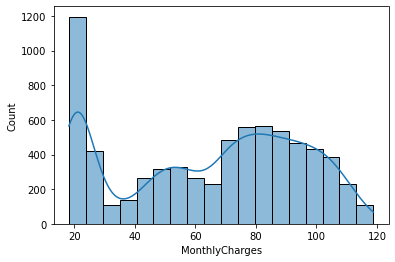

In [67]:
#Looking at the distribution inside the variable
sns.histplot(df['MonthlyCharges'], kde = True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

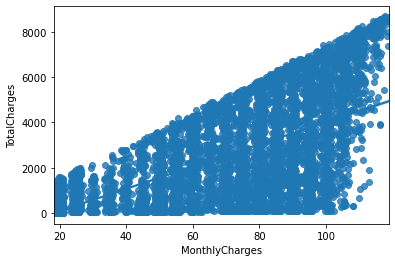

In [68]:
#Great Relationship between the two. So, a great predictor
sns.regplot(x = 'MonthlyCharges', y = 'TotalCharges', data = df)

In [69]:
X_Reg['MonthlyCharges'] = df['MonthlyCharges']

In [70]:
#Some columns need Encoding 
X_Reg.head()

,Partner,tenure,MultipleLines,Contract,MonthlyCharges
0,Yes,1,No phone service,Month-to-month,29.85
1,No,34,No,One year,56.95
2,No,2,No,Month-to-month,53.85
3,No,45,No phone service,One year,42.30
4,No,2,No,Month-to-month,70.70


In [71]:
y_Reg = pd.DataFrame()
y_Reg['TotalCharges'] = df['TotalCharges']

In [72]:
y_Reg.head()

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65


<a id = 'pre_reg'></a>
#### Preprocessing(Regression)
[Go To Top](#top)

In [73]:
#UDF to create dummies(or OneHotEncoding)
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [74]:
#Calling the UDF
X_Reg = create_dummies(X_Reg, 'Contract')

In [75]:
#Calling the UDF
X_Reg = create_dummies(X_Reg, 'MultipleLines')

In [76]:
#Checking to see if the changes are made
X_Reg.head()

,Partner,tenure,MonthlyCharges,Contract_One year,Contract_Two year,MultipleLines_No phone service,MultipleLines_Yes
0,Yes,1,29.85,0,0,1,0
1,No,34,56.95,1,0,0,0
2,No,2,53.85,0,0,0,0
3,No,45,42.30,1,0,1,0
4,No,2,70.70,0,0,0,0


In [77]:
#Label Encoding required for Column"Partner"
from sklearn.preprocessing import LabelEncoder

In [78]:
#Applying labelEncoder on Partner
X_Reg['Partner'] = LabelEncoder().fit_transform(X_Reg['Partner'])

In [79]:
X_Reg.head()

,Partner,tenure,MonthlyCharges,Contract_One year,Contract_Two year,MultipleLines_No phone service,MultipleLines_Yes
0,1,1,29.85,0,0,1,0
1,0,34,56.95,1,0,0,0
2,0,2,53.85,0,0,0,0
3,0,45,42.30,1,0,1,0
4,0,2,70.70,0,0,0,0


<a id = 'selection_reg'></a>
### Regression Model
[Go To Top](#top)

In [80]:
#Splitting data into training and testing(80,20 split)
from sklearn.model_selection import train_test_split
X_Reg_train, X_Reg_test, y_Reg_train, y_Reg_test = train_test_split(X_Reg,y_Reg, test_size = 0.2, random_state = 2)

In [81]:
#import Linear Regression Model
from sklearn.linear_model import LinearRegression

In [82]:
regr = LinearRegression()

In [83]:
#traing the linear Model
regr.fit(X_Reg_train, y_Reg_train)

LinearRegression()

In [84]:
#Predicting the test results
y_pred = regr.predict(X_Reg_test)

<a id = "res_reg"></a>
#### Results
[Go To Top](#top)

In [85]:
#Evaluating our model using some metrics
from sklearn.metrics import mean_squared_error, r2_score
print("MSE", mean_squared_error(y_Reg_test,y_pred))
print("R2" ,r2_score(y_Reg_test, y_pred))

MSE 532378.3556226613
R2 0.8986141905321454


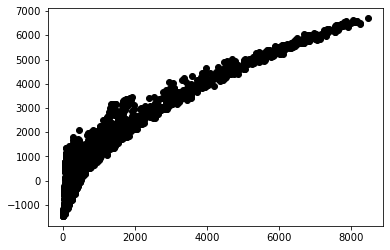

In [86]:
plt.scatter(y_Reg_test, y_pred,  color='black')

<a id = 'cl'></a>
# Classification
[Go To Top](#top)

<a id = 'eda_cl'></a>
#### Doing EDA(Exploratory Data Analysis) for Classification(target variable is `Churn`)

In [87]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [88]:
#looking at the unique values in this column we can see that Customer id is different for every record so it does not play any role in prediction
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [89]:
#Checking the distinct values in gender 
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [90]:
#Checking the count for each subcategoy
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [91]:
#Not good Distinction, therefore a bad predictor 
pd.crosstab(df['Churn'], df['gender'])

gender,Female,Male
Churn,,
No,2544,2619
Yes,939,930


In [92]:
#Checking the distinct values in gender 
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [93]:
#Checking the count for each subcategoy
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [94]:
#Not good Distinction, therefore a bad predictor  
pd.crosstab(df['SeniorCitizen'], df['Churn'], margins = 'all')

Churn,No,Yes,All
SeniorCitizen,,,
0,4497,1393,5890
1,666,476,1142
All,5163,1869,7032


In [95]:
#Checking the distinct values in gender 
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [96]:
#Checking the count for each subcategoy
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [97]:
#Not good Distinction, therefore a bad predictor  
pd.crosstab(df['Partner'], df['Churn'])

Churn,No,Yes
Partner,,
No,2439,1200
Yes,2724,669


In [98]:
#Checking the distinct values in gender 
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [99]:
#Checking the count for each subcategoy
df['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [100]:
#Alright predictor, will take into consideration
pd.crosstab(df['Dependents'], df['Churn'], margins = 'all')

Churn,No,Yes,All
Dependents,,,
No,3390,1543,4933
Yes,1773,326,2099
All,5163,1869,7032


In [101]:
#All the columns for classification models will be stored in X, and target columns wil be stored in y
X = pd.DataFrame()
y = pd.DataFrame()
y['Churn'] = df['Churn']
X['Dependents'] = df['Dependents']

In [102]:
#Checking the distinct values in gender 
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

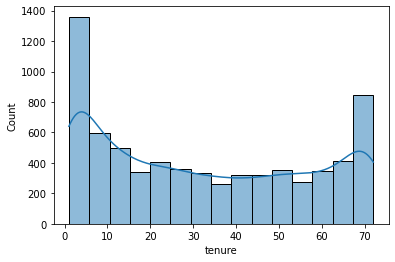

In [103]:
#Checking distribution
sns.histplot(df['tenure'], kde = True)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

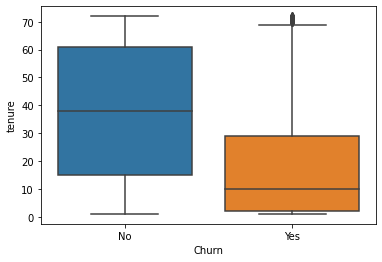

In [104]:
#Great distinction, therefore a good predictor
sns.boxplot(x = 'Churn', y = 'tenure', data = df)

In [105]:
X['tenure'] = df['tenure']

In [106]:
#Checking the distinct values in gender 
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [107]:
#Checking the count for each subcategoy
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [108]:
#Not great distinction and very few records in 'No' subcategory of Phoneservice
pd.crosstab(df['PhoneService'], df['Churn'], margins = 'all')

Churn,No,Yes,All
PhoneService,,,
No,510,170,680
Yes,4653,1699,6352
All,5163,1869,7032


In [109]:
#Checking the distinct values in gender 
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [110]:
#Checking the count for each subcategoy
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [111]:
#Not Great Distinction, not a good predictor
pd.crosstab(df['MultipleLines'], df['Churn'])

Churn,No,Yes
MultipleLines,,
No,2536,849
No phone service,510,170
Yes,2117,850


In [112]:
#Checking the distinct values in gender 
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [113]:
#Checking the count for each subcategoy
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [114]:
#Ok Predictor, good enough distinction
pd.crosstab(df['InternetService'], df['Churn'])

Churn,No,Yes
InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


In [115]:
#Considering this column for prediction
X['InternetService'] = df['InternetService']

In [116]:
#Checking the distinct values in gender 
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [117]:
#Checking the count for each subcategoy
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [118]:
#Too similar to the distribution of column 'InternetService', Therefore not considering this columnm for prediction
pd.crosstab(df['OnlineSecurity'], df['Churn'])

Churn,No,Yes
OnlineSecurity,,
No,2036,1461
No internet service,1407,113
Yes,1720,295


In [119]:
#Checking the distinct values in gender 
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [120]:
#Checking the count for each subcategoy
df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [121]:
#Too similar to the distribution of column 'InternetService', Therefore not considering this columnm for prediction
pd.crosstab(df['OnlineBackup'], df['Churn'])

Churn,No,Yes
OnlineBackup,,
No,1854,1233
No internet service,1407,113
Yes,1902,523


In [122]:
#Checking the distinct values in gender 
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [123]:
#Checking the count for each subcategoy
df['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [124]:
#Too similar to the distribution of column 'InternetService', Therefore not considering this columnm for prediction
pd.crosstab(df['DeviceProtection'], df['Churn'])

Churn,No,Yes
DeviceProtection,,
No,1883,1211
No internet service,1407,113
Yes,1873,545


In [125]:
#Checking the distinct values in gender 
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [126]:
#Checking the count for each subcategoy
df['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [127]:
#Too similar to the distribution of column 'InternetService', Therefore not considering this columnm for prediction
pd.crosstab(df['TechSupport'], df['Churn'])

Churn,No,Yes
TechSupport,,
No,2026,1446
No internet service,1407,113
Yes,1730,310


In [128]:
#Checking the distinct values in gender 
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [129]:
#Checking the count for each subcategoy
df['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [130]:
#Not Great distinction, therefore not a good predictor
pd.crosstab(df['StreamingTV'], df['Churn'])

Churn,No,Yes
StreamingTV,,
No,1867,942
No internet service,1407,113
Yes,1889,814


In [131]:
#Checking the distinct values in gender 
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [132]:
#Checking the count for each subcategoy
df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [133]:
#Not Great distinction, therefore not a good predictor
pd.crosstab(df['StreamingMovies'], df['Churn'])

Churn,No,Yes
StreamingMovies,,
No,1843,938
No internet service,1407,113
Yes,1913,818


In [134]:
#Checking the distinct values in gender 
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [135]:
#Checking the count for each subcategoy
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [136]:
#Good distinction, therefore a good predictor
pd.crosstab(df['Contract'], df['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


In [137]:
X['Contract'] = df['Contract']

In [138]:
#Checking the distinct values in gender 
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [139]:
#Checking the count for each subcategoy
df['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [140]:
#Not Great predictor
pd.crosstab(df['PaperlessBilling'], df['Churn'])

Churn,No,Yes
PaperlessBilling,,
No,2395,469
Yes,2768,1400


In [141]:
#Checking the distinct values in gender 
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [142]:
#Checking the count for each subcategoy
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [143]:
#Not great distinction
pd.crosstab(df['PaymentMethod'], df['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [144]:
#Checking the distinct values in gender 
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

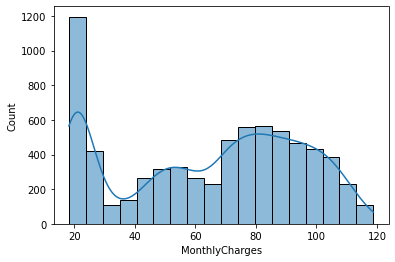

In [145]:
#Checking the distribution of the data
sns.histplot(df['MonthlyCharges'], kde = True)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

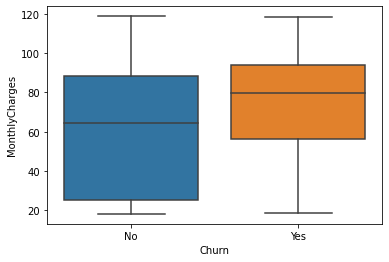

In [146]:
#Good Enough Predictor
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = df)

In [147]:
X['MonthlyCharges'] = df['MonthlyCharges']

In [148]:
#Checking the distinct values in gender 
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

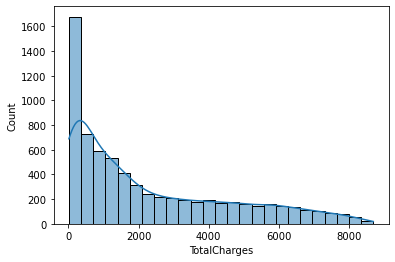

In [149]:
#Checking the distribution of the data
sns.histplot(df['TotalCharges'], kde = True)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

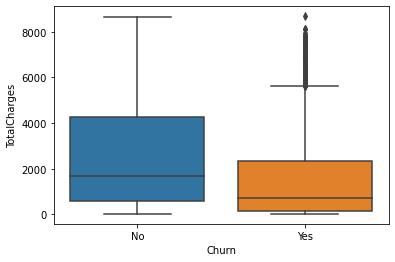

In [150]:
#good Predictor, but if we take this column there will be multicollinearity with column 'MonthlyCharges' and also there are some outliers in this column
#So not considering this Column 
sns.boxplot(x = 'Churn', y = 'TotalCharges', data = df)

<a id = 'pre_cl'></a>
### Preprocessing
[Go To Top](#top)

In [151]:
#Checking top 5 records
X.head()

,Dependents,tenure,InternetService,Contract,MonthlyCharges
0,No,1,DSL,Month-to-month,29.85
1,No,34,DSL,One year,56.95
2,No,2,DSL,Month-to-month,53.85
3,No,45,DSL,One year,42.30
4,No,2,Fiber optic,Month-to-month,70.70


In [152]:
#Checking datatypes and if we left any null values
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dependents       7032 non-null   object 
 1   tenure           7032 non-null   int64  
 2   InternetService  7032 non-null   object 
 3   Contract         7032 non-null   object 
 4   MonthlyCharges   7032 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 649.6+ KB


In [153]:
#oneHotEncoding Columns using UDF we created in the linear regression preprocessing
X = create_dummies(X, 'InternetService')
X = create_dummies(X, 'Contract')

In [154]:
#Label Encoding for the dependents variable
X['Dependents'] = LabelEncoder().fit_transform(X['Dependents'])
y['Churn'] = LabelEncoder().fit_transform(y['Churn'])

In [155]:
#Our Final Data
X.head()

,Dependents,tenure,MonthlyCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year
0,0,1,29.85,0,0,0,0
1,0,34,56.95,0,0,1,0
2,0,2,53.85,0,0,0,0
3,0,45,42.30,0,0,1,0
4,0,2,70.70,1,0,0,0


### Splitting the Data

In [301]:
#Splitting data into training and testing(80,20 split)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

## Model Selection

<a id = 'log'></a>
#### Logistic Regression
[Go To Top](#top)

In [302]:
#Importing Logistic Regressor
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [303]:
#Training the model
classifier.fit(X_train, y_train)

D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [304]:
#predicting using what our model has learned
y_pred = classifier.predict(X_test)

In [305]:
#import some metrics for evaluation
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score

<AxesSubplot:>

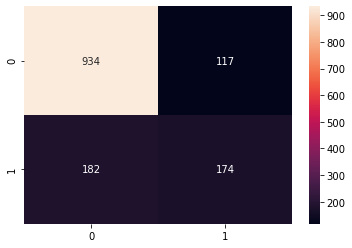

In [306]:
#Creating Confusion matrix to see how our model performed
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

In [307]:
print("Accuracy_Score =", accuracy_score(y_test, y_pred))
print("ROC_AUC_score =", roc_auc_score(y_test, y_pred))
print('MSE = ', mean_squared_error(y_test, y_pred))

Accuracy_Score = 0.7874911158493249
ROC_AUC_score = 0.6887207474956969
MSE =  0.2125088841506752


In [308]:
#LogisticRegression?

<a id = 'dt'></a>
#### Decision Tree
[Go To Top](#top)

In [309]:
#Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [310]:
#Training the model
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [311]:
#predicting using what our model has learned
y_pred = classifier.predict(X_test)

<AxesSubplot:>

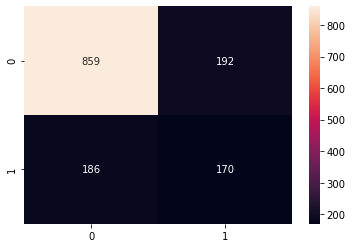

In [312]:
#Creating Confusion matrix to see how our model performed
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

In [313]:
print("Accuracy_Score =", accuracy_score(y_test, y_pred))
print("ROC_AUC_score =", roc_auc_score(y_test, y_pred))
print('MSE = ', mean_squared_error(y_test, y_pred))

Accuracy_Score = 0.7313432835820896
ROC_AUC_score = 0.6474224654956755
MSE =  0.26865671641791045


In [314]:
#Hyperparametric Tuning
from sklearn.model_selection import GridSearchCV
pGrid = {'max_depth': range(2, 10), # 8
        'min_samples_leaf': range(10, 51, 5),  # 10
        'min_samples_split': range(20, 81, 10)}   # 8

gscv_dt = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = pGrid, cv = 5,
                       scoring = 'recall', n_jobs = -1, verbose = True)

In [317]:
gscv_dt.fit(X, y)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2096 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:    6.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(10, 51, 5),
                         'min_samples_split': range(20, 81, 10)},
             scoring='recall', verbose=True)

In [318]:
gscv_dt.best_params_

{'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 50}

In [319]:
#Creatng model again with new improved parameters after using hyperparametric Tuning
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 10,
                                    min_samples_split = 50, random_state = 0)

In [320]:
#Training the model
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10,
                       min_samples_split=50, random_state=0)

In [321]:
#predicting using what our model has learned
y_pred = classifier.predict(X_test)

<AxesSubplot:>

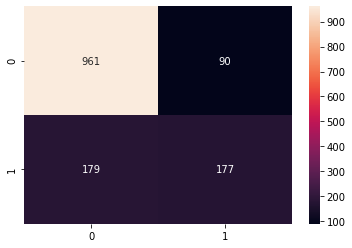

In [322]:
#Creating Confusion matrix to see how our model performed
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

In [323]:
#Updated Results
print("Accuracy_Score =", accuracy_score(y_test, y_pred))
print("ROC_AUC_score =", roc_auc_score(y_test, y_pred))
print('MSE = ', mean_squared_error(y_test, y_pred))

Accuracy_Score = 0.8088130774697939
ROC_AUC_score = 0.7057791402516597
MSE =  0.1911869225302061


<a id = 'rf'></a>
#### Random Forest
[Go To Top](#top)

In [324]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 1)

In [325]:
#RandomForestClassifier?

In [326]:
#Training the model
classifier.fit(X_train, y_train)

<ipython-input-326-d4475016f8c5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=1)

In [327]:
#predicting using what our model has learned
y_pred = classifier.predict(X_test)

<AxesSubplot:>

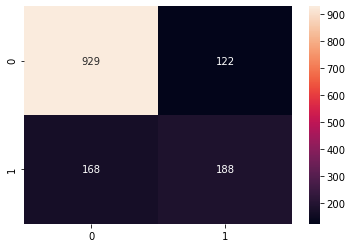

In [328]:
#Creating Confusion matrix to see how our model performed
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

In [329]:
print("Accuracy_Score =", accuracy_score(y_test, y_pred))
print("ROC_AUC_score =", roc_auc_score(y_test, y_pred))
print('MSE = ', mean_squared_error(y_test, y_pred))

Accuracy_Score = 0.7938877043354655
ROC_AUC_score = 0.7060049818792161
MSE =  0.20611229566453448


In [350]:
pargrid_rf = {'n_estimators': [60, 70, 80, 90, 100],
                  'max_features': [2,4,9,16]}

gscv_rf = GridSearchCV(estimator = RandomForestClassifier(), 
                        param_grid = pargrid_rf, 
                        cv = 5,
                        verbose = True, 
                        n_jobs = -1)

gscv_results = gscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.2s finished
D:\Python\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [352]:
gscv_results.best_params_

{'max_features': 2, 'n_estimators': 90}

In [353]:
#Creatng model again with new improved parameters after using hyperparametric Tuning
classifier = RandomForestClassifier(n_estimators = 90, max_features = 2, random_state = 1)

In [354]:
#Training the model
classifier.fit(X_train, y_train)

<ipython-input-354-d4475016f8c5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier(max_features=2, n_estimators=90, random_state=1)

In [355]:
#predicting using what our model has learned
y_pred = classifier.predict(X_test)

<AxesSubplot:>

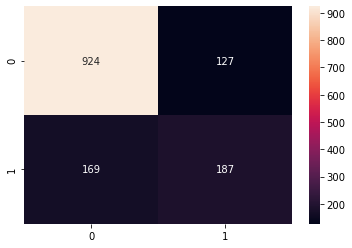

In [356]:
#Creating Confusion matrix to see how our model performed
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

In [357]:
#Updated Results
print("Accuracy_Score =", accuracy_score(y_test, y_pred))
print("ROC_AUC_score =", roc_auc_score(y_test, y_pred))
print('MSE = ', mean_squared_error(y_test, y_pred))

Accuracy_Score = 0.7896233120113717
ROC_AUC_score = 0.7022218005323982
MSE =  0.2103766879886283


<a id = 'knn'></a>
#### KNN
[Go To Top](#top)

In [358]:
#importing KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric = 'minkowski', p = 2)

In [359]:
#Training the model
classifier.fit(X_train, y_train)

<ipython-input-359-d4475016f8c5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [360]:
#predicting using what our model has learned
y_pred = classifier.predict(X_test)

<AxesSubplot:>

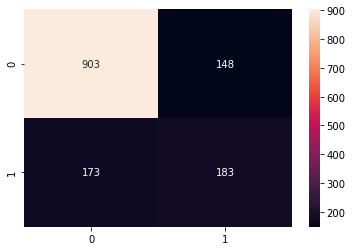

In [361]:
#Creating Confusion matrix to see how our model performed
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

In [362]:
print("Accuracy_Score =", accuracy_score(y_test, y_pred))
print("ROC_AUC_score =", roc_auc_score(y_test, y_pred))
print('MSE = ', mean_squared_error(y_test, y_pred))

Accuracy_Score = 0.7718550106609808
ROC_AUC_score = 0.6866133377521676
MSE =  0.2281449893390192


In [363]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 7)
(1407, 7)
(5625, 1)
(1407, 1)


<ipython-input-364-063612ab614a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train.values,y_train.values)
<ipython-input-364-063612ab614a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train.values,y_train.values)
<ipython-input-364-063612ab614a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train.values,y_train.values)
<ipython-input-364-063612ab614a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train.values,y_train.values)
<ipython-input-364-063612ab614a>:6: DataConversionWarning: A column-

<ipython-input-364-063612ab614a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train.values,y_train.values)
<ipython-input-364-063612ab614a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train.values,y_train.values)


Minimum error:- 0.3162136318104876 at K = 1


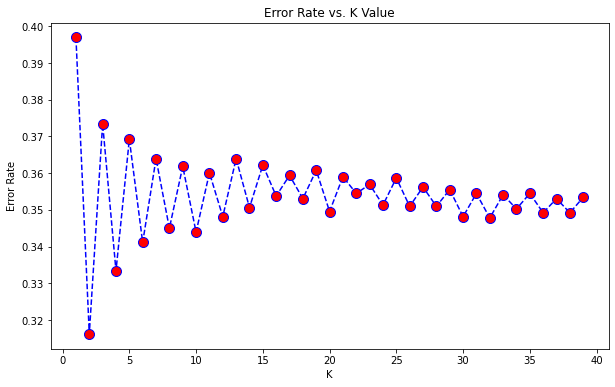

In [364]:
from sklearn import metrics

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train.values,y_train.values)
 pred_i = knn.predict(X_test.values)
 error_rate.append(np.mean(pred_i != y_test.values))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [370]:
#importing KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)

In [371]:
#Training the model
classifier.fit(X_train, y_train)

<ipython-input-371-d4475016f8c5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4)

In [372]:
#predicting using what our model has learned
y_pred = classifier.predict(X_test)

<AxesSubplot:>

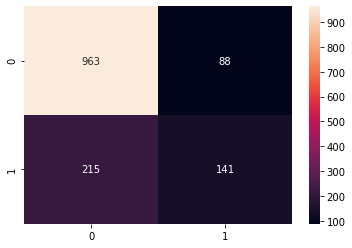

In [373]:
#Creating Confusion matrix to see how our model performed
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

In [374]:
print("Accuracy_Score =", accuracy_score(y_test, y_pred))
print("ROC_AUC_score =", roc_auc_score(y_test, y_pred))
print('MSE = ', mean_squared_error(y_test, y_pred))

Accuracy_Score = 0.7846481876332623
ROC_AUC_score = 0.656168817284769
MSE =  0.21535181236673773


<a id = 'svm'></a>
#### SVM
[Go To Top](#top)

In [375]:
#import the Support Vector Classifier model
from sklearn.svm import SVC
classifier = SVC()

In [376]:
#Training the model
classifier.fit(X_train, y_train)

D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [377]:
#predicting using what our model has learned
y_pred = classifier.predict(X_test)

<AxesSubplot:>

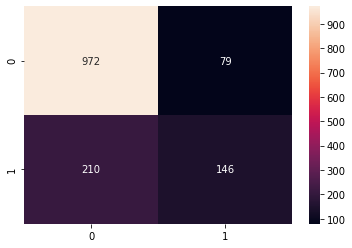

In [378]:
#Creating Confusion matrix to see how our model performed
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

In [379]:
print("Accuracy_Score =", accuracy_score(y_test, y_pred))
print("ROC_AUC_score =", roc_auc_score(y_test, y_pred))
print('MSE = ', mean_squared_error(y_test, y_pred))

Accuracy_Score = 0.7945984363894811
ROC_AUC_score = 0.6674729257315131
MSE =  0.20540156361051884


In [380]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [382]:
import warnings

In [388]:
svc_param_selection(X_train,y_train.values, 5)

D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Python\lib\site-packages\sklearn\utils\validation

D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Python\lib\site-packages\sklearn\utils\validation

D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Python\lib\site-packages\sklearn\utils\validation

{'C': 1, 'gamma': 0.01}

In [383]:
#After hyperparametric tuning
classifier = SVC(C = 1 , gamma = 0.01 )

In [384]:
#Training the model
classifier.fit(X_train, y_train)

D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, gamma=0.01)

In [385]:
#predicting using what our model has learned
y_pred = classifier.predict(X_test)

<AxesSubplot:>

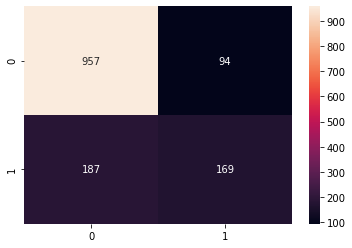

In [386]:
#Creating Confusion matrix to see how our model performed
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

In [387]:
print("Accuracy_Score =", accuracy_score(y_test, y_pred))
print("ROC_AUC_score =", roc_auc_score(y_test, y_pred))
print('MSE = ', mean_squared_error(y_test, y_pred))

Accuracy_Score = 0.8002842928216063
ROC_AUC_score = 0.6926402356236436
MSE =  0.19971570717839374


<a id = 'nb'></a>
#### Naive Bayes
[Go To Top](#top)

In [389]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [390]:
#Training the model
gnb.fit(X_train, y_train)

D:\Python\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [391]:
#predicting using what our model has learned
y_pred = gnb.predict(X_test)

<AxesSubplot:>

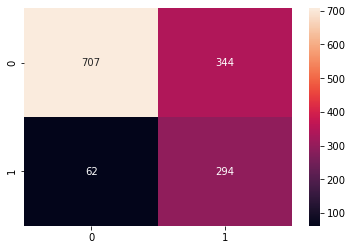

In [392]:
#Creating Confusion matrix to see how our model performed
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

In [393]:
print("Accuracy_Score =", accuracy_score(y_test, y_pred))
print("ROC_AUC_score =", roc_auc_score(y_test, y_pred))
print('MSE = ', mean_squared_error(y_test, y_pred))

Accuracy_Score = 0.7114427860696517
ROC_AUC_score = 0.749267685136681
MSE =  0.2885572139303483


In [300]:
#GaussianNB?

<a id = 'end'></a>
## End Results
[Go To Top](#top)

- For Regression, The linear regressor got MSE of 532378.3556226613 and Accuracy of 90%
- For Classification
    - The Best ROC_AUC_Score = Naive Bayes(74.92%)
    - The Best Accuracy_score = Decision Tree(80.8%)
    - The Best MSE = Decision Tree(0.1911)